# 自分で深層学習を実装してみる！！

# 3桁の２進数を、１０進数に変換するネット

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(sum_squared_error, y, teach, w):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001
    loss = sum_squared_error(y, teach)

    return (sum_squared_error(w+h)-sum_squared_error(w-h))/(2*h)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y


dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, x, y, teach, network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



[1 0 1]
[0.96167371 2.00432145 2.11397162 3.52794324 3.05661937 3.52794324
 3.99926711 3.99926711]
[0.96801139 2.01876735 2.12613393 3.55226786 3.07688988 3.55226786
 4.02764584 4.02764584]
[0.01184425 0.03387233 0.0377115  0.15697697 0.09758474 0.15697697
 0.25251662 0.25251662]


TypeError: bibun_numerical_gradient() takes 2 positional arguments but 5 were given

In [9]:
import numpy as np

def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result


# ごっちゃになってしまったので、作り直し

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y

def bibun_numerical_gradient(sum_squared_error ,ywh1, ywh2):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001

    return (sum_squared_error(ywh1)-sum_squared_error(ywh2))/(2*h)




dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y1 = forward(network, x)
    y2 = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, , network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



SyntaxError: invalid syntax (1216691841.py, line 118)

In [5]:
import numpy as np
import pprint
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3]
    return network




w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす


w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
b2 = np.array([[0.1, 0.2, 0.5, 0.3, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]]) #バイアスを8つのニューロンにたす

network = set_network(w1,b1,w2,b2,w3,b3)
pprint.pprint(network)
print("-------------------------------------------")
network[1][0][0] += 0.001
pprint.pprint(network)
print(len(network))

network1_zeros = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]

print(network1_zeros)



[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]),
 array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]]),
 array([[0.1, 0.4, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7]]),
 array([[0.1, 0.2, 0.5, 0.3, 0.4]]),
 array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]),
 array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]])]
-------------------------------------------
[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 

C:\Users\atusi\AppData\Local\Temp\ipykernel_25084\320260719.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


------endnetwork-------
[array([[ 0.82466438,  0.84456279, -0.73915424,  0.80823834,  1.63040035,
         1.1685652 , -0.12562496,  0.44586614],
       [ 0.43892175, -0.40983256,  1.80866138, -1.98751958, -0.60320376,
         0.59569872, -0.033024  ,  0.31435814],
       [ 0.73148793,  0.71224869,  1.10395482,  0.94485379,  0.94298065,
         0.45686569,  1.88436887,  1.43877372]]),
 array([[-0.57376683,  0.00276186, -0.00527183,  0.28155763, -0.00276317,
        -0.4531271 ,  0.1502687 , -0.48205839]]),
 array([[ 0.15815925,  0.8154408 , -0.11071096,  0.02674697,  0.16322595,
         0.94191798,  0.55966838, -0.04115439],
       [ 0.12406194,  0.35033532,  0.58312626,  0.17524808, -0.302215  ,
         0.46338881,  0.52977367,  0.29413039],
       [ 0.67402984,  0.23814321, -0.5343524 , -0.21897826,  2.18532756,
        -0.46268747, -0.48490461, -0.02823425],
       [ 0.40925886, -0.65468147,  1.25274625,  0.69419662, -0.84381433,
        -0.16216795,  0.81370845,  0.9756641 ],
 

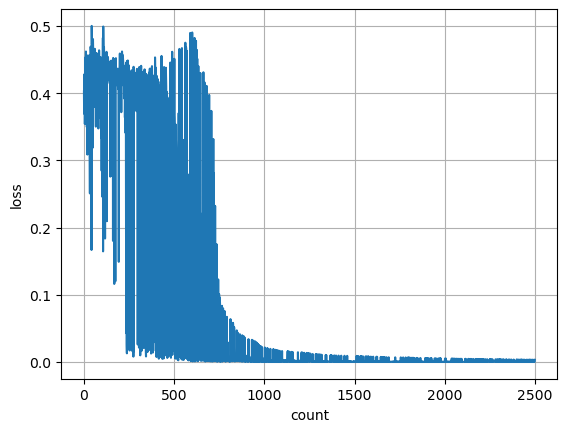

In [65]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4]) #　　　名前か番号か迷う
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 8
W2 = 8
W3 = 8


#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([3,W1])*0.3

#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*0.3
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*0.3

#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*0.3
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*0.3
b3 = np.random.random([1,W3])*0.3

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 2500


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                # Network2 = Network #コピーを作る
                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                # print(in_x)
                # print(teach)

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("----------------------------------")
                # pprint.pprint(koubai_list)
                # print(loss1)
                # print(loss2)

                # koubai_list = Network #コピーを作る
                # koubai_list - Network #引くことで、要素全部０の同じ形のリストを作成する！

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
                # pprint.pprint(koubai_list)
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新
    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [63]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

------endnetwork-------
[array([[ 1.16297574,  1.52418722,  0.49337646,  0.5501107 , -0.2089314 ,
         0.1983215 ,  1.85594913,  0.91443097],
       [ 0.44336271,  1.80899077,  1.03527587,  0.48789798,  1.42343613,
         0.24359962, -0.37630953, -0.07749627],
       [ 0.85023258, -0.9152391 ,  0.45103354,  0.44520726,  1.17302337,
         1.54948924,  0.73149584,  0.45821002]]),
 array([[-0.8110372 , -0.10979605, -0.45458878, -0.44801122, -0.14418228,
        -0.02336561, -0.00694149,  0.01524832]]),
 array([[ 0.44684797,  0.32288206,  0.32402073,  0.93975373,  0.50053494,
         0.75637742, -0.14581683,  0.85410407],
       [ 0.95526442,  0.32831731, -0.62284578,  0.06045907, -0.42451608,
         0.07103055,  2.22722946,  0.39415721],
       [ 0.35562732,  0.62489874,  0.22580764,  0.7248721 ,  0.30453432,
         0.21643409,  0.87012696, -0.07093147],
       [ 0.35070623,  0.37940306,  0.27199451,  0.73422167,  0.24811089,
         0.32184806,  0.39842429,  0.26426579],
 

In [13]:
print(in_x)
print(teach)
print(A)

loss4 = sum_squared_error(out_y2,teach)
print(out_y2)
print(teach)
print(loss4)

[1 1 0]
[0 0 0 0 0 0 1 0]
[[3.77734623e-08 9.99999251e-01 7.24244830e-08 3.44497903e-08
  6.06791301e-09 2.36032148e-08 1.73233428e-11 5.74643543e-07]]
[[7.59863086e-04 9.94944480e-01 8.71314560e-04 5.92535924e-04
  4.26119896e-04 6.84263600e-04 4.30420847e-05 1.67838065e-03]]
[0 0 0 0 0 0 1 0]
0.9949167953963287


In [2]:
import numpy as np
import pprint


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list
    return network






w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
               [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
               [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす
w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
               [0.2, 0.5, 0.1, 0.8, 0.1],
               [0.3, 0.6, 0.2, 0.5, 0.2],
               [0.2, 0.5, 0.4, 0.2, 0.3],
               [0.3, 0.6, 0.7, 0.3, 0.2],
               [0.2, 0.5, 0.3, 0.2, 0.5],
               [0.3, 0.6, 0.1, 0.1, 0.1],
               [0.2, 0.5, 0.1, 0.1, 0.2]]) #8つのニューロンから5つのニューロンに出力する際の重み
b2 = np.array([[0.1, 0.2, 0.2, 0.4, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
               [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
               [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
               [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
               [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]]) #バイアスを8つのニューロンにたす


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

pprint.pprint(Network)










koubai_list1 = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]
koubai_list2 = np.array(koubai_list)






w1 = np.random.random([3,8])
b1 = np.random.random([1,8])
w2 = np.random.random([8,5])
b2 = np.random.random([1,5])
w3 = np.random.random([5,8])
b3 = np.random.random([1,8])

Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

print("--------------------------------------------------")
pprint.pprint(Network)

print("--------------------------------------------------")
pprint.pprint(koubai_list1)

print("--------------------------------------------------")
pprint.pprint(koubai_list2)

[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]),
 array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]]),
 array([[0.1, 0.4, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.1, 0.8, 0.1],
       [0.3, 0.6, 0.2, 0.5, 0.2],
       [0.2, 0.5, 0.4, 0.2, 0.3],
       [0.3, 0.6, 0.7, 0.3, 0.2],
       [0.2, 0.5, 0.3, 0.2, 0.5],
       [0.3, 0.6, 0.1, 0.1, 0.1],
       [0.2, 0.5, 0.1, 0.1, 0.2]]),
 array([[0.1, 0.2, 0.2, 0.4, 0.4]]),
 array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
       [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
       [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
       [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
       [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]),
 array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]])]
--------------------------------------------------
[array([[0.01770847, 0.29120256, 0.12627468, 0.37546989, 0.75355643,
        0.30538809, 0.60758192, 0.3332781 ],
       [0.66263083, 0